# Numerical solution of projectile motion

Using Claude (claude.ai), providing the following input:

Write a Python code that simulates the motion of a projectile with mass "mass" in the plane (x, y). Consider only the gravitational force pointing down in the direction of the semiaxis -y and of magnitude mass*g.
Initial conditions at t = 0 are the position given by x(0) = 0.0 and y(0) = 0.0, the velocity with components v_x(0) = w*cos(phi) and v_y = w*sin(phi) where w = 5.0 and phi = pi/3.
Use the explicit Euler method to integrate the equations of motion. Compare the results of the numerical integration with the exact solution by plotting the trajectory in the (x, y) plane and separately graphing the x and y components of the position and velocity as functions of time.

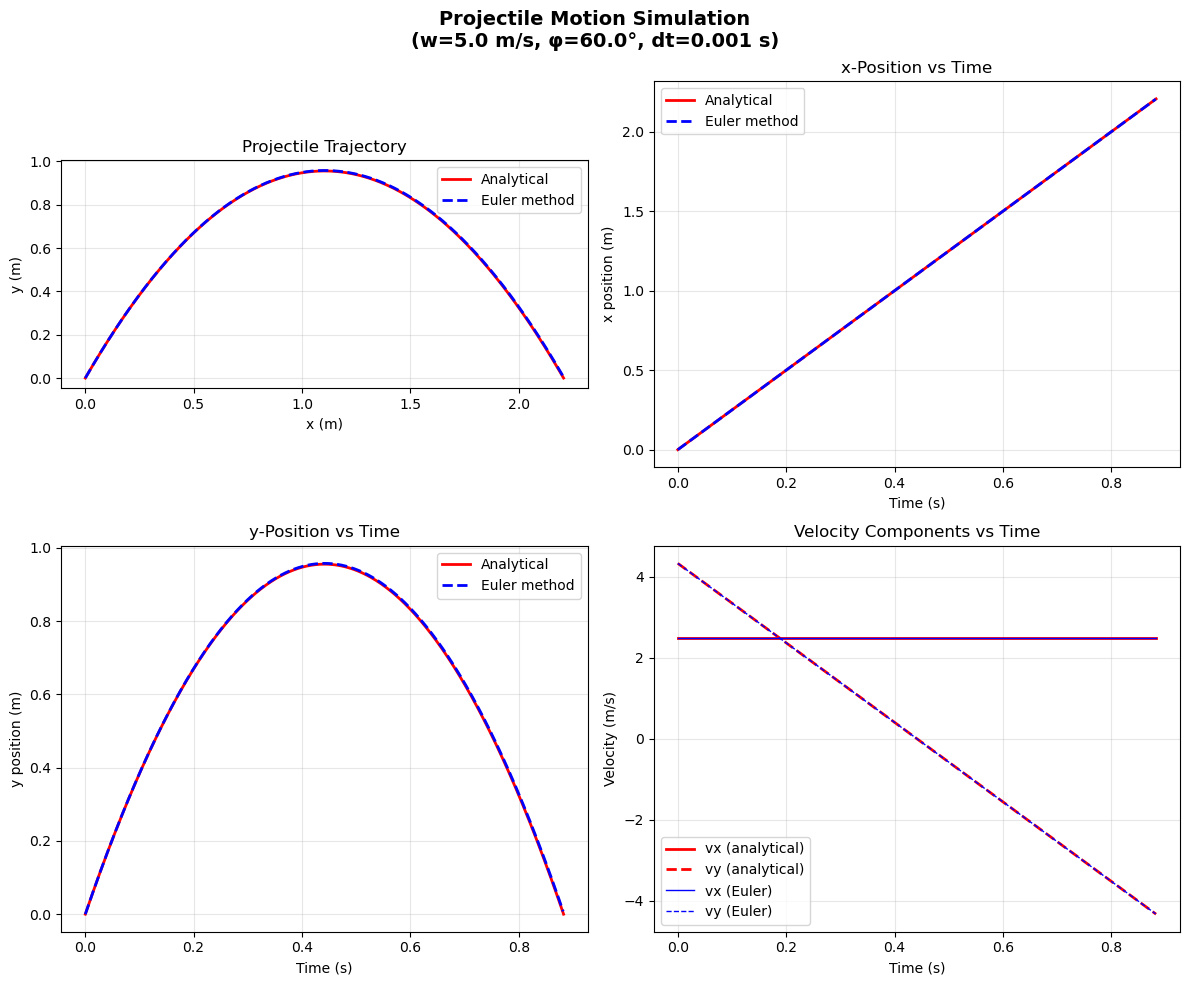

=== PROJECTILE MOTION RESULTS ===
Initial conditions:
  Launch speed: 5.0 m/s
  Launch angle: 60.0°
  Initial velocity: vx0 = 2.50 m/s, vy0 = 4.33 m/s
  Time step: 0.001 s

Analytical solution:
  Flight time: 0.883 s
  Range: 2.207 m
  Maximum height: 0.956 m

Numerical solution (Euler method):
  Flight time: 0.882 s
  Range: 2.205 m
  Maximum height: 0.958 m

Errors:
  Flight time error: 0.000799 s
  Range error: 0.001996 m
  Max height error: 0.002166 m


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mass = 1.0  # kg (mass cancels out in equations)
g = 9.81    # m/s^2 (gravitational acceleration)
w = 5.0     # m/s (initial speed)
phi = np.pi/3  # rad (launch angle)

# Initial conditions
x0, y0 = 0.0, 0.0  # initial position
vx0 = w * np.cos(phi)  # initial x-velocity
vy0 = w * np.sin(phi)  # initial y-velocity

# Time parameters
dt = 0.001  # time step for numerical integration
t_max = 2 * vy0 / g  # theoretical flight time
t_numerical = np.arange(0, t_max + dt, dt)
t_analytical = np.linspace(0, t_max, 1000)

# Numerical integration using explicit Euler method
def euler_integration(dt, t_max):
    """Integrate projectile motion using explicit Euler method"""
    n_steps = int(t_max / dt) + 1
    
    # Initialize arrays
    t = np.zeros(n_steps)
    x = np.zeros(n_steps)
    y = np.zeros(n_steps)
    vx = np.zeros(n_steps)
    vy = np.zeros(n_steps)
    
    # Initial conditions
    x[0], y[0] = x0, y0
    vx[0], vy[0] = vx0, vy0
    
    # Euler integration
    for i in range(1, n_steps):
        t[i] = i * dt
        
        # Update velocities (acceleration: ax = 0, ay = -g)
        vx[i] = vx[i-1]  # no acceleration in x-direction
        vy[i] = vy[i-1] - g * dt  # acceleration = -g in y-direction
        
        # Update positions
        x[i] = x[i-1] + vx[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt
        
        # Stop if projectile hits ground
        if y[i] < 0:
            # Trim arrays to actual flight time
            actual_steps = i + 1
            return (t[:actual_steps], x[:actual_steps], y[:actual_steps], 
                   vx[:actual_steps], vy[:actual_steps])
    
    return t, x, y, vx, vy

# Analytical solution
def analytical_solution(t):
    """Calculate exact projectile motion"""
    x_exact = vx0 * t
    y_exact = y0 + vy0 * t - 0.5 * g * t**2
    vx_exact = vx0 * np.ones_like(t)
    vy_exact = vy0 - g * t
    return x_exact, y_exact, vx_exact, vy_exact

# Perform numerical integration
t_num, x_num, y_num, vx_num, vy_num = euler_integration(dt, t_max)

# Calculate analytical solution
x_exact, y_exact, vx_exact, vy_exact = analytical_solution(t_analytical)

# Create plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle(f'Projectile Motion Simulation\n(w={w} m/s, φ={phi*180/np.pi:.1f}°, dt={dt} s)', 
             fontsize=14, fontweight='bold')

# Plot 1: Trajectory in x-y plane
ax1.plot(x_exact, y_exact, 'r-', linewidth=2, label='Analytical')
ax1.plot(x_num, y_num, 'b--', linewidth=2, label='Euler method')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_title('Projectile Trajectory')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_aspect('equal')

# Plot 2: x-position vs time
ax2.plot(t_analytical, x_exact, 'r-', linewidth=2, label='Analytical')
ax2.plot(t_num, x_num, 'b--', linewidth=2, label='Euler method')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('x position (m)')
ax2.set_title('x-Position vs Time')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: y-position vs time
ax3.plot(t_analytical, y_exact, 'r-', linewidth=2, label='Analytical')
ax3.plot(t_num, y_num, 'b--', linewidth=2, label='Euler method')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('y position (m)')
ax3.set_title('y-Position vs Time')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Velocities vs time
ax4.plot(t_analytical, vx_exact, 'r-', linewidth=2, label='vx (analytical)')
ax4.plot(t_analytical, vy_exact, 'r--', linewidth=2, label='vy (analytical)')
ax4.plot(t_num, vx_num, 'b-', linewidth=1, label='vx (Euler)')
ax4.plot(t_num, vy_num, 'b--', linewidth=1, label='vy (Euler)')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Velocity (m/s)')
ax4.set_title('Velocity Components vs Time')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

# Calculate and display key results
flight_time_exact = 2 * vy0 / g
range_exact = vx0 * flight_time_exact
max_height_exact = (vy0**2) / (2 * g)

flight_time_numerical = t_num[-1]
range_numerical = x_num[-1]
max_height_numerical = np.max(y_num)

print("=== PROJECTILE MOTION RESULTS ===")
print(f"Initial conditions:")
print(f"  Launch speed: {w:.1f} m/s")
print(f"  Launch angle: {phi*180/np.pi:.1f}°")
print(f"  Initial velocity: vx0 = {vx0:.2f} m/s, vy0 = {vy0:.2f} m/s")
print(f"  Time step: {dt} s")

print(f"\nAnalytical solution:")
print(f"  Flight time: {flight_time_exact:.3f} s")
print(f"  Range: {range_exact:.3f} m")
print(f"  Maximum height: {max_height_exact:.3f} m")

print(f"\nNumerical solution (Euler method):")
print(f"  Flight time: {flight_time_numerical:.3f} s")
print(f"  Range: {range_numerical:.3f} m")
print(f"  Maximum height: {max_height_numerical:.3f} m")

print(f"\nErrors:")
print(f"  Flight time error: {abs(flight_time_numerical - flight_time_exact):.6f} s")
print(f"  Range error: {abs(range_numerical - range_exact):.6f} m")
print(f"  Max height error: {abs(max_height_numerical - max_height_exact):.6f} m")